Doing the calculations and making the plot for Figure 10 - the VWIND constraint

In [52]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')

In [2]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/VWIND/DATA/"
errordatdir="../ERRORCALC/VWIND/DATA/"

Read in CMIP5 and CMIP6 vwind data.

In [3]:
cmip5 = xr.open_dataset(datdir+"cmip5vwindindices.nc")
cmip6 = xr.open_dataset(datdir+"cmip6vwindindices.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")

Read in observational data and group together

In [4]:
obsdata=xr.open_dataset(datdir+"vampobs.nc")
vampobs=np.zeros([4])
vampobs[0]=obsdata.vamp_era5 ; vampobs[1]=obsdata.vamp_erai
vampobs[2]=obsdata.vamp_jra ; vampobs[3]=obsdata.vamp_merra

The CMIP6 emergent constraint

In [5]:
cmip5ols = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5['vfutsw_em']-cmip5['vpastsw_em'], cmip5['vpastamp_1mem'], cmip5['vfutsw_1mem']-cmip5['vpastsw_1mem'],vampobs, 
                                     sigyem=errorem5['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
cmip5tls = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5['vfutsw_em']-cmip5['vpastsw_em'], cmip5['vpastamp_1mem'], cmip5['vfutsw_1mem']-cmip5['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
cmip5bhm = constraint.dotheconstraint(cmip5['vpastamp_em'],cmip5['vfutsw_em']-cmip5['vpastsw_em'], cmip5['vpastamp_1mem'], cmip5['vfutsw_1mem']-cmip5['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem5['sig_psi'], sigyem=errorem5['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], 
                                     rxyem=errorem5['r_psi_vdiff'],rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [6]:
cmip6ols = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6['vfutsw_em']-cmip6['vpastsw_em'], cmip6['vpastamp_1mem'], cmip6['vfutsw_1mem']-cmip6['vpastsw_1mem'],vampobs, 
                                     sigyem=errorem6['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
cmip6tls = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6['vfutsw_em']-cmip6['vpastsw_em'], cmip6['vpastamp_1mem'], cmip6['vfutsw_1mem']-cmip6['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
cmip6bhm = constraint.dotheconstraint(cmip6['vpastamp_em'],cmip6['vfutsw_em']-cmip6['vpastsw_em'], cmip6['vpastamp_1mem'], cmip6['vfutsw_1mem']-cmip6['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem6['sig_psi'], sigyem=errorem6['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], 
                                     rxyem=errorem6['r_psi_vdiff'],rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


In [7]:
cmip56 = xr.concat([cmip5, cmip6], "Model")
errorem56 = xr.concat([errorem5, errorem6],"Model")
cmip56ols = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='OLS')
cmip56tls = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'],method='TLS')
cmip56bhm = constraint.dotheconstraint(cmip56['vpastamp_em'],cmip56['vfutsw_em']-cmip56['vpastsw_em'], cmip56['vpastamp_1mem'], cmip56['vfutsw_1mem']-cmip56['vpastsw_1mem'],vampobs, 
                                     sigxem=errorem56['sig_psi'], sigyem=errorem56['sig_vdiff'], sigx1mem=error1mem['sig_psi'], sigy1mem=error1mem['sig_vdiff'], 
                                     rxyem=errorem56['r_psi_vdiff'],rxy1mem=error1mem['r_psi_vdiff'],method='BHM')

aols, bols = linfit.linfit_xy(cmip56['vpastamp_em'], cmip56['vfutsw_em']-cmip56['vpastsw_em'], sigma=errorem56['sig_vdiff'])
atls, btls = linfit.tls(cmip56['vpastamp_em'], cmip56['vfutsw_em']-cmip56['vpastsw_em'], errorem56['sig_psi'], errorem56['sig_vdiff'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['vpastamp_em'], cmip56['vfutsw_em']-cmip56['vpastsw_em'], errorem56['sig_psi'], errorem56['sig_vdiff'], 
                                                         errorem56['r_psi_vdiff'], iseed=3)
abhm = np.mean(abhmall) ; bbhm = np.mean(bbhmall)

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


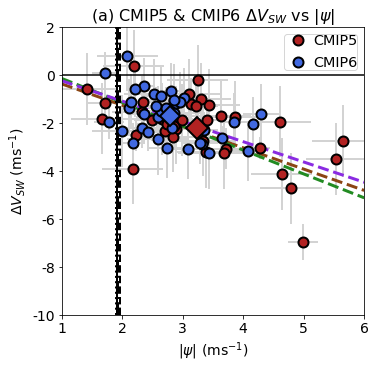

In [78]:
fig = plt.figure()
w=12 ; h=5
fig.set_size_inches(w,h)
ax1 = fig.add_axes(np.array([0.05,0.1,0.35,0.8]))

yerr5 = 1.96*errorem5['sig_vdiff'] ; yerr6 = 1.96*errorem6['sig_vdiff']
xerr5 = 1.96*errorem5['sig_psi'] ; xerr6 = 1.96*errorem6['sig_psi']

ax1 = ecfig.vwindscattersetup(ax1,'(a) CMIP5 & CMIP6 $\Delta V_{SW}$ vs $|\psi|$')

#zero line
ax1.plot([1,6],[0,0],color='black')

# OLS regression
x=np.arange(1,7,1)
y=aols + bols*x
ax1.plot(x,y,color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls+btls*x
ax1.plot(x,y,color='forestgreen', linewidth=3, linestyle='dashed')

# BHM regression
y=abhm + bbhm*x
ax1.plot(x,y,color='blueviolet', linewidth=3, linestyle='dashed')

# observed values
ax1.plot([obsdata["vamp_era5"], obsdata["vamp_era5"]],[-10,2], color="black", linewidth=2)
ax1.plot([obsdata["vamp_erai"], obsdata["vamp_erai"]],[-10,2], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["vamp_jra"], obsdata["vamp_jra"]],[-10,2], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["vamp_merra"], obsdata["vamp_merra"]],[-10,2],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['vpastamp_em'],cmip5['vfutsw_em']-cmip5['vpastsw_em'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['vpastamp_em'],cmip6['vfutsw_em']-cmip6['vpastsw_em'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['vpastamp_em'].mean(), cmip5['vfutsw_em'].mean()-cmip5['vpastsw_em'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', 
         markersize=15, markeredgewidth=2)
ax1.plot(cmip6['vpastamp_em'].mean(), cmip6['vfutsw_em'].mean()-cmip6['vpastsw_em'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', 
         markersize=14, markeredgewidth=2)

ax1.errorbar(cmip5['vpastamp_em'], cmip5['vfutsw_em']-cmip5['vpastsw_em'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['vpastamp_em'], cmip5['vfutsw_em']-cmip5['vpastsw_em'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6['vfutsw_em']-cmip6['vpastsw_em'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['vpastamp_em'], cmip6['vfutsw_em']-cmip6['vpastsw_em'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)

ax1.legend(handletextpad=0, fontsize='x-large', borderpad=0)

In [79]:
ylim=(-10,2)
ax2 = fig.add_axes(np.array([0.43,0.1,0.23,0.8]))
ax2.set_ylim(ylim)
ax2.set_xlim(-0.5,16.5)
ax2.set_xticks([])
ax2.set_yticks([-10,-8,-6,-4,-2,0,2])
ax2.set_yticklabels(['-10','-8','-6','-4','-2','0','2'], fontsize=14)
ax2.set_title('(b) CMIP5', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black', zorder=1)

vswdifs = cmip5['vfutsw_em']-cmip5['vpastsw_em']
min66 = np.percentile(vswdifs, 17)
max66 = np.percentile(vswdifs, 83)

ax2.plot([-0.5,16.5],[vswdifs.mean(), vswdifs.mean()], color='firebrick', zorder=1, linewidth=5)
ax2.plot([-0.5,16.5],[min66,min66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66,max66], color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

vdifstring = '{0:6.2f}'.format(np.array(vswdifs.mean())).strip()
ax2.text(1, -10.5,'$\Delta V_{SW}$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax2.text(1,-11, vdifstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP6 model points
ax2.plot(np.zeros([cmip5.Model.size])+1, vswdifs,"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax2.plot([2.5,2.5],[-10,2], color='black')

# all the emergent constraint info
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols, cmip5tls, cmip5bhm, ylim)

In [80]:
ylim=(-10,2)
ax3 = fig.add_axes(np.array([0.69,0.1,0.23,0.8]))

ax3.set_ylim(ylim)
ax3.set_xlim(-0.5,16.5)
ax3.set_xticks([])
ax3.set_yticks([-10,-8,-6,-4,-2,0,2])
ax3.set_yticklabels(['-10','-8','-6','-4','-2','0','2'], fontsize=14)
ax3.set_title('(c) CMIP6', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black', zorder=1)

vswdifs = cmip6['vfutsw_em']-cmip6['vpastsw_em']
min66 = np.percentile(vswdifs, 17)
max66 = np.percentile(vswdifs, 83)

ax3.plot([-0.5,16.5],[vswdifs.mean(), vswdifs.mean()], color='royalblue', zorder=1, linewidth=5)
ax3.plot([-0.5,16.5],[min66,min66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66,max66], color='royalblue', zorder=1, linewidth=3, linestyle='dotted')

vdifstring = '{0:6.2f}'.format(np.array(vswdifs.mean())).strip()
ax3.text(1, -10.5,'$\Delta V_{SW}$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax3.text(1,-11, vdifstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP6 model points
ax3.plot(np.zeros([cmip6.Model.size])+1, vswdifs,"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2)
ax3.plot([2.5,2.5],[-10,2], color='black')

# all the emergent constraint info
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols, cmip6tls, cmip6bhm, ylim)

In [81]:
ax4 = fig.add_axes(np.array([0.95,0.1,0.23,0.8]))

ax4.set_ylim(ylim)
ax4.set_xlim(-0.5,16.5)
ax4.set_xticks([])
ax4.set_yticks([-10,-8,-6,-4,-2,0,2])
ax4.set_yticklabels(['-10','-8','-6','-4','-2','0','2'], fontsize=14)
ax4.set_title('(d) CMIP56', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black', zorder=1)

vswdifs = cmip56['vfutsw_em']-cmip56['vpastsw_em']
min66 = np.percentile(vswdifs, 17)
max66 = np.percentile(vswdifs, 83)

ax4.plot([-0.5,16.5],[vswdifs.mean(), vswdifs.mean()],color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.45,16.5],[vswdifs.mean(), vswdifs.mean()],color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

vdifstring = '{0:6.2f}'.format(np.array(vswdifs.mean())).strip()
ax4.text(1, -10.5,'$\Delta V_{SW}$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax4.text(1,-11, vdifstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP5 and 6 model points
ax4.plot(np.zeros([cmip5.Model.size])+0.4,cmip5['vfutsw_em']-cmip5['vpastsw_em'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot(np.zeros([cmip6.Model.size])+1.6,cmip6['vfutsw_em']-cmip6['vpastsw_em'],"o",markerfacecolor='royalblue',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot([2.5,2.5],ylim, color='black')

ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols, cmip56tls, cmip56bhm, ylim)

In [82]:
# the legend
legendparts=[Rectangle((0.95,0.95),5,3,facecolor='saddlebrown'),
             Rectangle((0.95,0.95),5,3,facecolor='forestgreen'),
             Rectangle((0.95,0.95),5,3,facecolor='blueviolet')]

legendlabels=['OLS','TLS','BHM']
fig.legend(legendparts, legendlabels, bbox_to_anchor=(0.95, 0.05), ncol=3, frameon=False, fontsize='x-large', handlelength=1, handleheight=1, handletextpad=0.4)

In [83]:
fig.patch.set_facecolor('white')
fig
fig.savefig('fig10.png', facecolor='white', bbox_inches='tight')